# Problem Set 1: Explore, Visualize and Describe a Data Set (90 pts)
### Summary and Motivation
Problem Set 1 provides a comprehensive introduction to key statistical concepts and their application using Python. This problem set focuses on fundamental techniques such as variance, standard deviation, covariance, and correlation, and extends to hypothesis testing and data visualization. By working through these problems, students will gain practical experience in statistical analysis and data interpretation, essential skills for tackling real-world economic and business issues. This hands-on practice with Python not only reinforces theoretical knowledge but also enhances computational proficiency, preparing students for advanced data analytics tasks.
### Instruction
- Please follow below questions and instructions to complete this problem set. In some questions, please write and execute Python code for data analysis in Cell mode. Comment your code to explain each step. And use `Shift+Enter` to excute your code.
- Some questions need text discussion. Please Provide a detailed discussion of your results, including interpretations and answers to questions in Raw mode.

- Once you have completed the assignment, save your Jupyter notebook with the following naming convention: ECN394_ProblemSetX_LastName_FirstName.ipynb (replace X with the assignment number).


Questions 1 - 3 ask you to manually calculate sample statistics.  Do this on a piece of paper, scan, or take a picture. Upload it with your Python notebook. _You can submit multiple pages, if necessary._

# Part 1: Statistical Concepts (64 pts, 4 pts per question)

### Problem 1: Variance and Standard Deviation

Consider the following dataset sampled from a population.

[4, 8, 6, 5, 3]

a. Calculate the mean of the dataset.  Show your work.  _Turn in on a sheet of paper, label 1a_

b. Calculate the sample variance of the dataset. Show your work.  _Turn in on a sheet of paper, label 1b_


c. Calculate sample the standard deviation of the dataset.  Show your work. _Turn in on a sheet of paper, label 1c_.


d. Recompute the mean, sample variance, and sample standard deviation using Python, performing this task in two distinct ways:

- (i) Manually code the calculations for mean, sample variance, and sample standard deviation to calculate these statistics. Ensure your code accurately reflects the mathematical definitions of these measures. Please use `print()` to show your answers.

In [1]:
import pandas as pd
import numpy as np

In [1]:
# Please write your executable code below
data = [4, 8, 6, 5, 3]

array_sum = sum(data)
n = len(data)

mean = array_sum/n
mean

squared_devs = 0
for i in data:
    squared_devs += (i-mean)**2

var = squared_devs / (n-1)
std_dev = var ** (1/2)

print(mean, var, std_dev)

5.2 3.7 1.9235384061671346


- (ii) Utilize Python’s built-in functions or numpy or pandas to compute the mean, sample variance, and sample standard deviation. Please use `print()` to show your answers. Please use `print()` to show your answers.

In [2]:
# Please write your executable code below


mean = np.mean(data)
var = np.var(data, ddof=1)
std_dev = np.std(data, ddof=1)
print(mean, var, std_dev)

NameError: name 'np' is not defined

### Problem 2: Covariance 
Given a dataset with two variables sampled from a population.

X: 1, 2, 3, 4, 5

Y: 2, 3, 5, 7, 11

a. Calculate the sample mean of X and Y. Show your work.  _Turn in on a separate piece of paper and label 2a._

b. Calculate the sample covariance between X and Y.  Show your work. _Calculate on a separate piece of paper label 2b._

c. Recompute the mean of X and Y, and sample covariance using Python, performing this task in two distinct ways:

- (i) Manually code the sample mean, and sample covariance formulas to calculate these statistics. Ensure your code accurately reflects the mathematical definitions of these measures.


In [13]:
# Please write your executable code here
X = [1, 2, 3, 4, 5]
Y = [2, 3, 5, 7, 11]

# For X
array_sum_X = sum(X)
n_X = len(X)
mean_X = array_sum_X/n_X

# For Y
array_sum_Y = sum(Y)
n_Y = len(Y)
mean_Y = array_sum_Y/n_Y

# n_X is equal to n_Y
covariance = sum((X[i] - mean_X) * (Y[i] - mean_Y) for i in range(n_X)) / (n_Y - 1)

print(mean_X, mean_Y, covariance)

(3.0, 5.6, 5.5)

- (ii) Utilize Python’s built-in functions or relevant libraries (e.g., NumPy) to compute the sample mean of X and Y and sample covariance. 


In [5]:
# Please write your executable code here
mean_X = np.mean(X)
mean_Y = np.mean(Y)
# [0][1] needs to be specified because np.cov() returns a matrix
covariance = np.cov(X, Y)[0][1]
covariance

5.5

### Problem 3: Correlation 
Using the dataset from Problem 2:

a. Calculate the correlation coefficient between X and Y.  _Do this manually and turn in on a separate piece of paper labeled 3a._


b. Utilize Python’s built-in functions or relevant libraries (e.g., NumPy) to compute the correlation.


In [6]:
# Please write your executable code here
correlation = np.corrcoef(X, Y) 
# the corrcoef() method produces a matrix so we need to use indexing to get the number
correlation[1,0]

0.9722718241315028

### Problem 4: Properties of Variances and Covariances

a. If X and Y are independent, what is Cov(X,Y)? Explain your reasoning.


### Problem 5: Standard Errors

Suppose you have a sample of size n=50 with a sample mean of x̄ = 10 and a standard deviation of s = 2.

a. Calculate the standard error of the sample mean.  _Turn in on a separate sheet of paper and label 5a._


b. Recompute the standard error of the sample mean using Python.


In [7]:
# Please write your executable code here

n = 50
x_bar = 10
s = 2

std_error = s / (n**0.5)
std_error

0.282842712474619

### Problem 6: Application of Concepts 

a. If the variance of a dataset is 0, what can you say about the data?


b.  A study shows a correlation coefficient of -0.8 between the amount of time spent studying and the number of errors made on a test. Interpret this result.


c.  What is the intepretation of the standard error of sample mean?  Why is the standard error important to know?


# Part 2: Data Visualization (26 pts)

In this problem, you will draw 3 plots. It is designed to help you apply the analytical skills you have acquired to examine the relationship between educational attainment, background characteristics and income across different group. The dataset data NLSY97.xlsx, available on CANVAS, contains all necessary information. These data are sourced from the NLSY97, a representative national database of individuals born in the early 1980s in the United States. Below are some variables we will use:
- educ: number of years of education completed
- annual_income: Annual income from wages
- gender: denotes the gender of the individual
- minority: 1 if the individual belongs to a minority group, 0 otherwise.
- mother_educ: 1 if the individual’s mother has a college degree, 0 otherwise.
- gpa_grade_9: GPA in 8th grade.
- retention: 1 if the individual was required to repeat a grade during middle school, 0 otherwise.

1. Load the data and needed libraries.  _Hint_ `pd.read_excel(data_NLSY97.xlsx)` to read the data (2pts)

In [8]:
# Please write your executatble code here
df = pd.read_excel("data_NLSY97.xlsx", index_col=0)
df

,educ,gpa_grade_8,retention,annual_income,total_weeks_exper,black,hispanic,white,mother_educ,minority,gender
PUBID - YTH ID CODE 1997,,,,,,,,,,,
1,16.0,3.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,female
2,14.0,3.5,0.0,115000.0,965.0,0.0,1.0,0.0,0.0,1.0,male
3,14.0,3.0,0.0,NaN,776.0,0.0,1.0,0.0,0.0,1.0,female
4,12.0,4.0,0.0,45000.0,1008.0,0.0,1.0,0.0,0.0,1.0,female
5,12.0,2.5,0.0,150000.0,890.0,0.0,1.0,0.0,0.0,1.0,male
...,...,...,...,...,...,...,...,...,...,...,...
9018,8.0,2.0,0.0,90000.0,942.0,0.0,0.0,1.0,0.0,0.0,female
9019,13.0,1.5,1.0,43000.0,824.0,0.0,1.0,0.0,0.0,1.0,male
9020,14.0,3.5,0.0,NaN,494.0,0.0,0.0,1.0,0.0,0.0,male


2. Create a histogram of annual nicome, and interpret the result (8pts)

array([[<Axes: title={'center': 'annual_income'}>]], dtype=object)

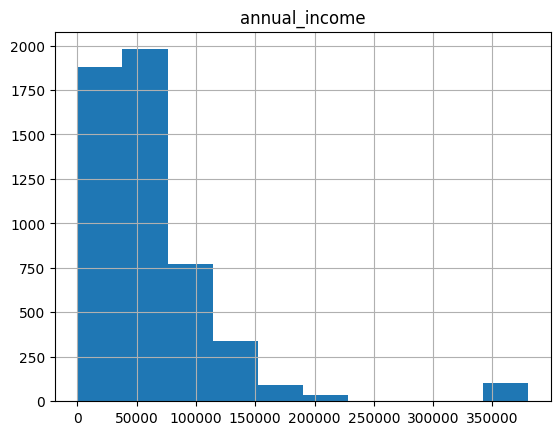

In [9]:
# Please write your executatble code here
import matplotlib.pyplot as plt

hist_1 = df.hist('annual_income')
hist_1

3. Create boxplots of wages for males and females on the same axes.  (8pts)

<Figure size 1000x600 with 0 Axes>

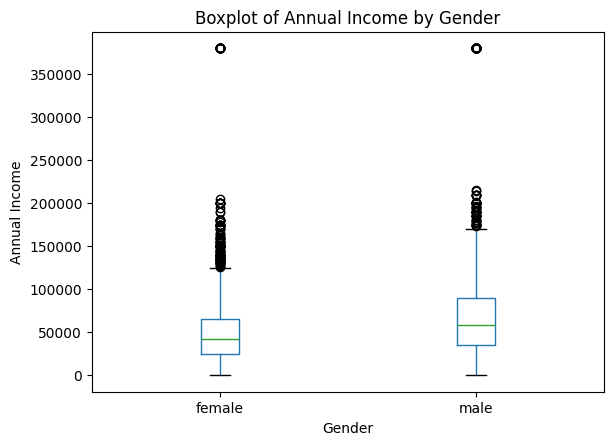

In [10]:
# Please write your executatble code here
df = df.dropna(subset=['annual_income'])

plt.figure(figsize=(10, 6))

df.boxplot(column='annual_income', by='gender', grid=False)

plt.title('Boxplot of Annual Income by Gender')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Annual Income')

plt.show()

4. Create a scatter plot with completed education years `educ` in the x-axis and wage `annual_income` in the y-axis. And interpret the result. (8pts)

<Axes: xlabel='educ', ylabel='annual_income'>

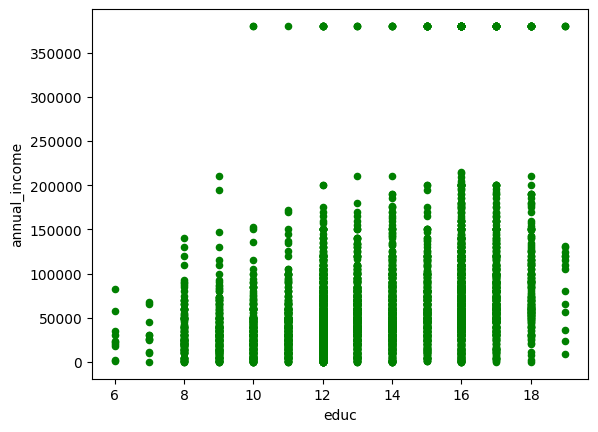

In [15]:
# Please write your executatble code here

df.plot.scatter(x='educ',
                      y='annual_income',
                      c='green')